<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

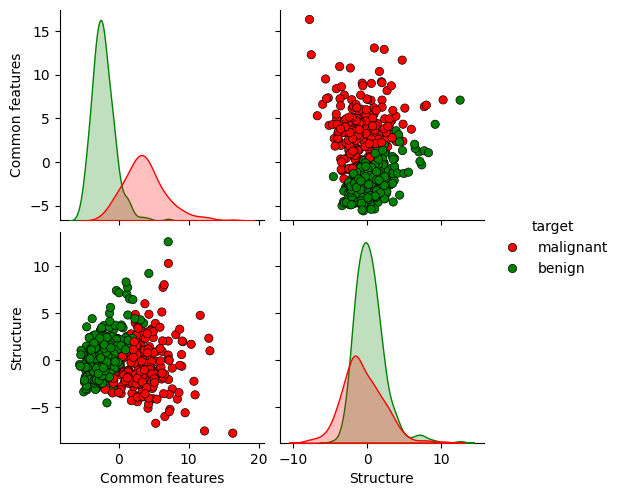

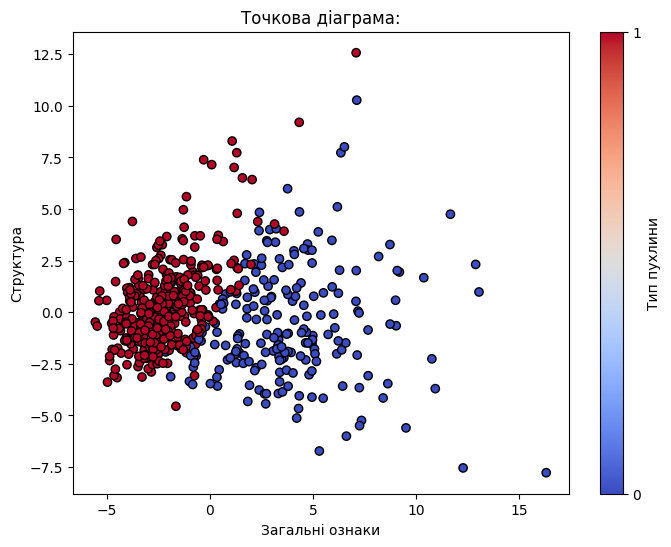

Матриця Евклідових відстаней
 [[ 0.         10.31849715  6.77763352 ... 11.82848346  6.97565122
  16.46384957]
 [10.31849715  0.          5.0320153  ...  4.98423172 10.89864277
  10.18812963]
 [ 6.77763352  5.0320153   0.         ...  6.1529742   6.92728594
  12.35436322]
 ...
 [11.82848346  4.98423172  6.1529742  ...  0.         10.55170316
   8.10241293]
 [ 6.97565122 10.89864277  6.92728594 ... 10.55170316  0.
  16.67463275]
 [16.46384957 10.18812963 12.35436322 ...  8.10241293 16.67463275
   0.        ]]
Матриця Манхетенських відстаней
 [[ 0.         48.30016071 31.06065549 ... 55.44470523 24.09638683
  84.55501338]
 [48.30016071  0.         23.06903905 ... 21.52646577 48.52903158
  45.9290339 ]
 [31.06065549 23.06903905  0.         ... 29.64500616 29.83157525
  59.35740976]
 ...
 [55.44470523 21.52646577 29.64500616 ...  0.         50.0958664
  38.38030293]
 [24.09638683 48.52903158 29.83157525 ... 50.0958664   0.
  81.56452906]
 [84.55501338 45.9290339  59.35740976 ... 38.3803029

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances, adjusted_rand_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean, cityblock, cosine


def print_data(data, text):
    print(text)
    print(data)
    print('----------')

def transform_values(values = [], names = []):
    res = []

    for value in values:
        if value:
            res.append(names[1])
        else:
            res.append(names[0])
    
    return res

#завантаження даних
breast_cancer_value = load_breast_cancer()
breast_cancer_data = breast_cancer_value['data'] #x-ознаки
breast_cancer_target = breast_cancer_value['target'] #y-ознаки
breast_cancer_target_names = breast_cancer_value['target_names']
breast_cancer_target_transformed = transform_values(breast_cancer_target, breast_cancer_target_names)
breast_cancer_feature_names = breast_cancer_value['feature_names']


#створен дата фрейм
df = pd.DataFrame(breast_cancer_data, columns= breast_cancer_feature_names)
df['target'] = breast_cancer_target_transformed

#виведення інформації
print_data(df.info(), '*** DATA INFO ***')

#виведення описових статистик
print_data(df.describe(), '*** Data statistic ***')

# стандартизація
def data_scale(data, scaler_type = 'std'):
    scaler = StandardScaler()
    return scaler.fit_transform(data)

data_scaled = data_scale(breast_cancer_data)
df_scaled = pd.DataFrame(data_scaled, columns= breast_cancer_feature_names)
df_scaled['target'] = breast_cancer_target_transformed
print('Виведення результату стандартизації: \n', df_scaled.describe());

#зниження розмірності матриці(PCA)
pca = PCA(n_components=2, n_oversamples=10)
data_pca = pca.fit_transform(data_scaled)

df_pca_data= pd.DataFrame(data_pca, columns=['Common features', 'Structure'])
df_pca_data['target']= breast_cancer_target_transformed
print(df_pca_data)

#точкові діаграми
sns.pairplot(df_pca_data, hue='target', hue_order=['malignant', 'benign'], palette=['red', 'green'], plot_kws={'edgecolor': 'black'})
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_data['Common features'], df_pca_data['Structure'], c=breast_cancer_target, cmap='coolwarm', edgecolors='k')
plt.colorbar(ticks=[0,1], label='Тип пухлини')
plt.title('Точкова діаграма:')
plt.xlabel('Загальні ознаки')
plt.ylabel('Структура')
plt.show()

# Матриця відстаней
### Обчислюємо Евклідову відстань
euclidean_distance_matrix= pairwise_distances(data_scaled, metric='euclidean')

### Обчислюємо Манхетенську відстань
manhattan_distance_matrix= pairwise_distances(data_scaled, metric= 'manhattan')

### Обчислюємо косинусну відстань
cosine_distance_matrix = pairwise_distances(data_scaled, metric= 'cosine')

### Обчислюємо L1 відстань
l1_distance_matrix = pairwise_distances(data_scaled, metric= 'l1')

### Обчислюємо Cityblock відстань
cityblock_distance_matrix = pairwise_distances(data_scaled, metric= 'cityblock')
    
## Виводимо результат матриць відстані
print('Матриця Евклідових відстаней\n', euclidean_distance_matrix)
print('Матриця Манхетенських відстаней\n', manhattan_distance_matrix)
print('Матриця Косинусних відстаней\n', cosine_distance_matrix)
print('Матриця L1 відстаней\n', l1_distance_matrix)
print('Матриця Cityblock відстаней\n', cityblock_distance_matrix)

# #візуалізація матриць
# matrix_distances = [euclidean_distance_matrix, manhattan_distance_matrix, cosine_distance_matrix]

# ari_scores = {}
# metrics = ['euclidean', 'manhattan', 'cosine']

# print("Скорегований індекс для кожної метрики:")
# for i in range(len(matrix_distances)):
#     matrix_data = matrix_distances[i]
#     metric = metrics[i]
#     dist = pairwise_distances(matrix_data, metric=metric)
#     model = AgglomerativeClustering(n_clusters=2, metric='precomputed', linkage='average')
#     pred_labels = model.fit_predict(dist)
#     ari = adjusted_rand_score(breast_cancer_target, pred_labels)
#     ari_scores[metric] = ari
#     print(f"{metric:<10} ARI = {ari:.3f}")

# plt.figure(figsize=(8, 5))
# sns.barplot(x=list(ari_scores.keys()), y=list(ari_scores.values()), palette='viridis')
# plt.title("Скорегований індекс для різних метрик")
# plt.xlabel("Метрика відстані")
# plt.ylabel("Індекс")
# plt.ylim(0, 1.05)
# plt.tight_layout()
# plt.show()



